# Amal Kariyawasam, 24/07/2022
# Exploring Data analysis by working on sample grocery sales data that is embeded in several CSV files

### Problem Statement
A grocery sales company is looking for patterns in its sales data regarding regions, sales reps, and product categories. Conduct an analysis to surface any notable patterns, particularly related to sales results.

### Deliverables 
Submit a Jupyter Notebook containing:

- Imported data, including at least two Data Frames and at least one combination of Data Frames via methods such as joining.
    
- Functions for cleaning the data set, with explanations for how null values are being handled in each field.
    
- At least two visualizations accompanied by textual descriptions of the business insights they communicate.

### Process

![Process](process.jpg "Data Analysis Process")

Follow this approach to start addressing your chosen problem statement. 
Feel free, as you begin exploring your data, to develop different questions than the ones provided. Let the data guide your analysis. 

    1. Clean the data with rationale-backed handling of null or missing values.
    2. Join the data sets together into a single DataFrame.
    3. Analyze sales results and supply chain logistics in relation to other data points of your choosing.
    4. Based on your analysis: Propose an hypothesis around patterns and correlations revealed during the analysis.

# 1.0 Frame
- Develops well-informed, hypothesis-driven business questions for analysis.
- Demonstrates ability to iterate and refine business questions based on new insights.


A grocery sales company is looking for patterns in its sales data regarding regions, sales reps, and product categories. Conduct an analysis to surface any notable patterns, particularly related to sales results.

### 1.1 What is the business questions/objectives we are trying to analyze ?
- Profit Margins
- Region performance
- Sales representative performance


### 1.2 What we need to see in data that will help stake holders understand, learn and help to improve sales ?
- For profit margins
    - what are the Five most profitable items ?
    - what are the Five most un-profitable items ?

- For region perfromance
    - Most highest Grossing Regions
    - Least Grossing Regions

- For sales representative performance
    - Highest sales by sales reps ?
    - Least sales by sales reps ?

# 2.0 Extract 
- Selects data that is relevant to the hypothesis-driven business question(s). 
- Uses data extraction techniques and formatting appropriate for the selected data.

## 2.1 Following code will open relevant .CSV files and load them into relevant data frames

In [1]:
# !dir #This will list all the files in the current directory
import pandas as pd #This will import the pandas library
import numpy as np
import matplotlib as plt
import seaborn as sns
# set the plots to display in the Jupyter notebook
%matplotlib inline

df_item_master=pd.read_csv('item_master.csv',encoding="ISO-8859-1")

df_cities=pd.read_csv('cities.csv',encoding="ISO-8859-1")

df_customers=pd.read_csv('customers.csv',encoding="ISO-8859-1")

df_sales=pd.read_csv('sales.csv',encoding="ISO-8859-1")

df_sales_rep=pd.read_csv('sales_rep.csv',encoding="ISO-8859-1")

In [2]:
df_item_master #Code to check whether data frame is loaded correctly
df_item_master.info() #Check for data frame information

# Possible Data frame joining method
#Join Item Number (df_item_master) with Item Number (df_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item Number        827 non-null    int64 
 1   Product Group      827 non-null    object
 2   Product Line       827 non-null    object
 3   Product Sub Group  827 non-null    object
 4   Product Type       827 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.4+ KB


In [3]:
df_sales #Code to check whether data frame is loaded correctly
df_sales.info()#Check for data frame information

# Possible Data frame joining method
#Join Item Number (df_item_master) with Item Number (df_sales)
#Join Customer Number (df_customers) with Customer Number (df_sales)
#Join Sales Rep Number (df_sales) with Sales Rep ID (df_sales_rep)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %KEY                    96466 non-null  int64  
 1   Cost                    96466 non-null  float64
 2   Customer Number         96466 non-null  int64  
 3   Date                    96466 non-null  object 
 4   GrossSales              96466 non-null  float64
 5   Invoice Date            96466 non-null  object 
 6   Invoice Number          96466 non-null  int64  
 7   Item Desc               96466 non-null  object 
 8   Item Number             96466 non-null  int64  
 9   Margin                  96466 non-null  float64
 10  Order Number            96466 non-null  int64  
 11  Promised Delivery Date  96466 non-null  object 
 12  Sales                   96466 non-null  float64
 13  Sales Qty               96466 non-null  float64
 14  Sales Rep Number        96466 non-null

In [4]:
df_customers #Code to check whether data frame is loaded correctly
df_customers.info()#Check for data frame information

# Possible Data frame joining method
#Join Customer Number (df_customers) with Customer Number (df_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         684 non-null    object
 1   Customer Number  684 non-null    int64 
 2   City Code        684 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


In [5]:
df_cities #Code to check whether data frame is loaded correctly
df_cities.info()#Check for data frame information

# Possible Data frame joining method
#Join City Code (df_cities) with City Code (df_customers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       100 non-null    object 
 1   City Code  100 non-null    int64  
 2   Region     100 non-null    object 
 3   Latitude   100 non-null    float64
 4   Longitude  100 non-null    float64
 5   Desc       99 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [6]:
df_sales_rep #Code to check whether data frame is loaded correctly
df_sales_rep.info()#Check for data frame information

# Possible Data frame joining method
#Join Sales Rep Number (df_sales) with Sales Rep ID (df_sales_rep)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Manager          64 non-null     object
 1   Manager Number   64 non-null     int64 
 2   Path             64 non-null     object
 3   Sales Rep Name   64 non-null     object
 4   Sales Rep Name1  64 non-null     object
 5   Sales Rep Name2  59 non-null     object
 6   Sales Rep Name3  39 non-null     object
 7   Sales Rep ID     64 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


# 3.0 Wrangle / Prepare
- Implements data cleaning techniques such as removing duplicates and correcting erroneous values. 
- Organizes raw data into a workable, analytics-friendly format. 

## 3.1 df_item_master Data Frame

In [7]:
df_item_master.isnull().sum().sort_index(ascending=False) # Check for null values
# df_item_master has zero null values

Product Type         0
Product Sub Group    0
Product Line         0
Product Group        0
Item Number          0
dtype: int64

## 3.2 df_cities Data Frame

In [8]:
df_cities.isnull().sum().sort_index(ascending=False) # Check for null values
# df_cities has 1 null value in Desc column

df_cities[df_cities.isna().any(axis=1)]
df_cities.sample()
#Leave the value and fill the null value in Desc column with "MISSING DESCRIPTION DATA" string as we don't wan't to get rid of that data

,City,City Code,Region,Latitude,Longitude,Desc
72,Tampere,73,Nordic,61.498021,23.760312,"""Tampere, Pirkanmaa, Western Finland, FI"""


## 3.3 df_customers Data Frame

In [9]:
df_customers.isnull().sum().sort_index(ascending=False) # Check for null values
# df_customers has zero null values

Customer Number    0
Customer           0
City Code          0
dtype: int64

## 3.4 df_sales Data Frame

In [10]:
df_sales.isnull().sum().sort_index(ascending=False) # Check for null values
# df_sales has zero null values

Sales Rep Number          0
Sales Qty                 0
Sales                     0
Promised Delivery Date    0
Order Number              0
Margin                    0
Item Number               0
Item Desc                 0
Invoice Number            0
Invoice Date              0
GrossSales                0
Date                      0
Customer Number           0
Cost                      0
%KEY                      0
dtype: int64

## 3.5 df_sales_rep Data Frame

In [11]:
df_sales_rep.isnull().sum().sort_index(ascending=False) # Check for null values
# df_sales_rep has 25 Null values in Sales Rep Name3, 5 Null values in Sales Rep Name2

df_sales_rep[df_sales_rep.isna().any(axis=1)]

# From the table we can see that with the data that is avilable for column 'Sales Rep Name2'
# 5 missing values in Sales Rep Name2 has the same data in other columns of 
#'Manager' , 'Sales Rep Name', 'Sales Rep Name1'. 'Sales Rep Name2' and 'Sales Rep Name3' from the data. 
# Hence we can simply assign 'Sales Rep Name2'='Manager'. 

# For Sales Rep Name3 it seems from the columns that have the data for 'Sales Rep Name3' it is same as the data 
# in 'Sales Rep Name' so we can simply replace null values in 'Sales Rep Name3'= 'Sales Rep Name'

#Test Code
# df_sales_rep["Sales Rep Name2"].isnull().sum()
# df_sales_rep["Sales Rep Name3"].isnull().sum()
# df_sales_rep["Sales Rep Name2"].isnull().sum() & df_sales_rep["Sales Rep Name3"].isnull().sum()
# df_sales_rep["Sales Rep Name2"].isnull().sum()
# df_sales_rep[df_sales_rep.eq("MISSING DESCRIPTION DATA").any(1)]
# print(df_sales_rep)

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,NaN,159
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,NaN,176
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,NaN,121
5,Brenda Gibson,109,Brenda Gibson-Ken Roberts,Ken Roberts,Brenda Gibson,Ken Roberts,NaN,145
6,Brenda Gibson,109,Brenda Gibson-Robert Kim,Robert Kim,Brenda Gibson,Robert Kim,NaN,163
7,Brenda Gibson,109,Brenda Gibson-William Fisher,William Fisher,Brenda Gibson,William Fisher,NaN,185
21,John Greg,134,John Greg-David Laychak,David Laychak,John Greg,David Laychak,NaN,118
22,John Greg,134,John Greg-Kathy Clinton,Kathy Clinton,John Greg,Kathy Clinton,NaN,144


## 3.6 Status of Data Sources / CSV files
- df_item_master has zero null values
- df_cities has 1 null value in Desc column
- df_customers has zero null values
- df_sales has zero null values
- df_sales_rep has 25 Null value in 'Sales Rep Name3', 5 Null values in 'Sales Rep Name2'

## 3.7 Based on the above we can do the following to clean the data
### 3.7.1 df_cities
**df_cities has 1 null value in Desc column**
- Leave the value and fill the null value in Desc column with "MISSING DESCRIPTION DATA" string as we don't wan't to get rid of that data

In [12]:
#df_cities cleaning according to above logic
df_cities["Desc"].fillna("MISSING DESCRIPTION DATA", inplace=True) #This code will replace null value
df_cities.isnull().sum().sort_index(ascending=False) # This will check whether above code removed null values
df_cities[df_cities.eq("MISSING DESCRIPTION DATA").any(1)] # This will check to see whether above code worked by searching for string "MISSING DESCRIPTION DATA"

,City,City Code,Region,Latitude,Longitude,Desc
94,Yokohama,95,Japan,35.455592,139.572196,MISSING DESCRIPTION DATA


### 3.7.2 df_sales_rep
**df_sales_rep has 5 Null values in Sales Rep Name2 and 25 Null values in Sales Rep Name3**
- Sales Rep Name2: From the table we can see that with the data that is avilable for column 'Sales Rep Name2', 5 missing values in Sales Rep Name2 has the same data in other columns of 'Manager', 'Sales Rep Name', 'Sales Rep Name1'. 'Sales Rep Name2' and 'Sales Rep Name3' from the data. Hence we can simply assign 'Sales Rep Name2'= 'Manager'. 
- Sales Rep Name3: For Sales Rep Name3 it seems from the columns that have the data for 'Sales Rep Name3' it is same as the data in 'Sales Rep Name' so we can simply replace null values in 'Sales Rep Name3'= 'Sales Rep Name' 

In [13]:
#Code to remove null values for Sales Rep Name2 as per above logic
df_sales_rep["Sales Rep Name2"].fillna(df_sales_rep["Manager"], inplace=True) #This code will replace null value with MISSING DESCRIPTION DATA"
df_sales_rep.isnull().sum().sort_index(ascending=False) # This will check for null values
df_sales_rep["Sales Rep Name2"]
print(df_sales_rep)

# df_sales_rep.drop_duplicates() # This will drop duplicate data

           Manager  Manager Number                          Path  \
0     Amanda Honda             104     Amanda Honda-Amalia Craig   
1     Amanda Honda             104       Amanda Honda-Cart Lynch   
2     Amanda Honda             104   Amanda Honda-Molly McKenzie   
3     Amanda Honda             104      Amanda Honda-Sheila Hein   
4    Brenda Gibson             109  Brenda Gibson-Dennis Johnson   
..             ...             ...                           ...   
59    Amanda Honda             104                  Amanda Honda   
60   Brenda Gibson             109                 Brenda Gibson   
61       John Greg             134                     John Greg   
62  Samantha Allen             169                Samantha Allen   
63    Stewart Wind             181                  Stewart Wind   

    Sales Rep Name Sales Rep Name1 Sales Rep Name2 Sales Rep Name3  \
0     Amalia Craig    Amanda Honda    Amalia Craig             NaN   
1       Cart Lynch    Amanda Honda      Car

In [14]:
#Code to remove null values for Sales Rep Name3 as per above logic

df_sales_rep["Sales Rep Name3"].fillna(df_sales_rep["Sales Rep Name"], inplace=True) #This code will replace null value"
df_sales_rep.isnull().sum().sort_index(ascending=False) # This will check whether above code removed null values
df_sales_rep["Sales Rep Name3"]
print(df_sales_rep)

           Manager  Manager Number                          Path  \
0     Amanda Honda             104     Amanda Honda-Amalia Craig   
1     Amanda Honda             104       Amanda Honda-Cart Lynch   
2     Amanda Honda             104   Amanda Honda-Molly McKenzie   
3     Amanda Honda             104      Amanda Honda-Sheila Hein   
4    Brenda Gibson             109  Brenda Gibson-Dennis Johnson   
..             ...             ...                           ...   
59    Amanda Honda             104                  Amanda Honda   
60   Brenda Gibson             109                 Brenda Gibson   
61       John Greg             134                     John Greg   
62  Samantha Allen             169                Samantha Allen   
63    Stewart Wind             181                  Stewart Wind   

    Sales Rep Name Sales Rep Name1 Sales Rep Name2 Sales Rep Name3  \
0     Amalia Craig    Amanda Honda    Amalia Craig    Amalia Craig   
1       Cart Lynch    Amanda Honda      Car

## 3.8 Combining Data Frames
** Following code will combine above data frames **

In [15]:
# Combine df_item_master with df_sales
combined_df_item_master_df_sales=pd.merge(df_item_master,df_sales, how="left", left_on="Item Number", right_on="Item Number")
combined_df_item_master_df_sales.columns

# df_item_master.columns
# df_sales.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', '%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number'],
      dtype='object')

In [16]:
#Combine combined_df_item_master_df_sales with df_customers
combined_df_item_master_df_sales_df_customers=pd.merge(combined_df_item_master_df_sales,df_customers, how="left", left_on="Customer Number", right_on="Customer Number")
combined_df_item_master_df_sales_df_customers.columns

# df_customers.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', '%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number',
       'Customer', 'City Code'],
      dtype='object')

In [17]:
df_sales_rep.columns

Index(['Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3',
       'Sales Rep ID'],
      dtype='object')

In [18]:
combined_df_item_master_df_sales_df_customers_df_cities=pd.merge(combined_df_item_master_df_sales_df_customers,df_cities, how="left", left_on="City Code", right_on="City Code")
combined_df_item_master_df_sales_df_customers_df_cities.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', '%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number',
       'Customer', 'City Code', 'City', 'Region', 'Latitude', 'Longitude',
       'Desc'],
      dtype='object')

In [19]:
# Creating of the final data frame
df_final=pd.merge(combined_df_item_master_df_sales_df_customers_df_cities,df_sales_rep, how="left", left_on="Sales Rep Number", right_on="Sales Rep ID")
df_final.columns
df_final

# df_final.drop_duplicates() # This will drop duplicate data

,Item Number,Product Group,Product Line,Product Sub Group,Product Type,%KEY,Cost,Customer Number,Date,GrossSales,...,Longitude,Desc,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,10001,Beverages,Drink,Juice,Pure Juice Beverages,69689,0.00,10025919,8/2/2013,20.0300,...,139.510395,"""Kanto, JP""",Samantha Allen,169,Samantha Allen-Brad Taylor,Brad Taylor,Samantha Allen,Brad Taylor,Brad Taylor,108
1,10002,Beverages,Drink,Flavored Drinks,Drinks,32383,4946.11,10011521,4/8/2012,6238.7000,...,-21.942237,"""Reykjavik, IS""",Micheal Williams,157,Stewart Wind-Micheal Williams-Sandra Howard,Sandra Howard,Stewart Wind,Micheal Williams,Sandra Howard,172
2,10002,Beverages,Drink,Flavored Drinks,Drinks,41093,4946.11,10011521,5/6/2012,6238.7000,...,-21.942237,"""Reykjavik, IS""",Micheal Williams,157,Stewart Wind-Micheal Williams-Sandra Howard,Sandra Howard,Stewart Wind,Micheal Williams,Sandra Howard,172
3,10002,Beverages,Drink,Flavored Drinks,Drinks,55473,4889.78,10011521,6/13/2012,6238.7000,...,-21.942237,"""Reykjavik, IS""",Micheal Williams,157,Stewart Wind-Micheal Williams-Sandra Howard,Sandra Howard,Stewart Wind,Micheal Williams,Sandra Howard,172
4,10002,Beverages,Drink,Flavored Drinks,Drinks,62872,200.07,10026532,7/4/2012,230.2492,...,-1.131229,"""Leicester, Leicestershire, England, GB""",Carolyn Halmon,111,Stewart Wind-Carolyn Halmon-Ronald Milam,Ronald Milam,Stewart Wind,Carolyn Halmon,Ronald Milam,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97216,11971,Eggs,Food,Eggs,Eggs,90443,0.00,10023715,10/17/2013,12.4900,...,-2.597394,"""Bristol, Bristol, England, GB""",John Davis,132,Stewart Wind-John Davis-TAGnology,TAGnology,Stewart Wind,John Davis,TAGnology,180
97217,11971,Eggs,Food,Eggs,Eggs,97854,0.00,10020192,11/13/2013,34.4900,...,136.900000,"""Nagoya, Chita, Chubu Region, JP""",Kathy Clinton,144,John Greg-Kathy Clinton-Janice Scott,Janice Scott,John Greg,Kathy Clinton,Janice Scott,130
97218,11971,Eggs,Food,Eggs,Eggs,98022,0.00,10009985,11/14/2013,34.9200,...,141.354460,"""Sapporo, Sorachi District, Hokkaido Region, JP""",Molly McKenzie,159,Amanda Honda-Molly McKenzie-Scott Powell,Scott Powell,Amanda Honda,Molly McKenzie,Scott Powell,173
97219,11971,Eggs,Food,Eggs,Eggs,1311,6511.39,10009660,1/4/2014,9033.8160,...,10.395193,"""Trondheim, Trondheim, S?r-Tr?ndelag, NO""",Stephanie Reagan,179,Samantha Allen-Stephanie Reagan-Brenda Kegler,Brenda Kegler,Samantha Allen,Stephanie Reagan,Brenda Kegler,110


In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97221 entries, 0 to 97220
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item Number             97221 non-null  int64  
 1   Product Group           97221 non-null  object 
 2   Product Line            97221 non-null  object 
 3   Product Sub Group       97221 non-null  object 
 4   Product Type            97221 non-null  object 
 5   %KEY                    97221 non-null  int64  
 6   Cost                    97221 non-null  float64
 7   Customer Number         97221 non-null  int64  
 8   Date                    97221 non-null  object 
 9   GrossSales              97221 non-null  float64
 10  Invoice Date            97221 non-null  object 
 11  Invoice Number          97221 non-null  int64  
 12  Item Desc               97221 non-null  object 
 13  Margin                  97221 non-null  float64
 14  Order Number            97221 non-null

# 4.0 Analyze / Integrity check
- Manipulates data for exploration, insight gathering, and analysis.
- Uses rationale for revising the original business question, collecting more data based on the initial analysis, or continuing on to interpretation. 

    For profit margins
        what are the Five most profitable items ?
        what are the Five most un-profitable items ?
        
        profit=price-cost
        df_final[["Margin","Product Sub Group"]].sort_values(ascending=False, by="Margin").head(5)
        df_final[["Margin","Product Sub Group"]].sort_values(ascending=True, by="Margin").head(5)

    For region perfromance
        Five most profitable regions ?
        Five most un-profitable regions ?

    For sales representative performance
        Five sales reps with most sales ?
        Five sales reps with least sales ?


## 4.1 Exploration, insight gathering, and analysis


In [21]:
#Test and experiment Code 

# df_final.Margin.max()

# df_final[df_final["Margin",]>1].sort_values("Margin")['Margin'].head(5)

# df_final[df_final["Product Sub Group"]=="Eggs"]

# df_final["Sales Qty"].sort_values(ascending=False).head(5)

# df_final.columns

# df_final["Sales"].sum()

# df_final.head()

# df_final["Cost"].value_counts().sort_index().plot.bar(x="Cost",y="Margin",rot=0)

In [22]:
# Following are all columns with Float and Integers
df_final[["Item Number","%KEY","Cost","Customer Number",
          "GrossSales","Invoice Number",
          "Margin","Order Number","Sales","Sales Qty",
          "Sales Rep Number","Manager Number","Sales Rep ID"]]

,Item Number,%KEY,Cost,Customer Number,GrossSales,Invoice Number,Margin,Order Number,Sales,Sales Qty,Sales Rep Number,Manager Number,Sales Rep ID
0,10001,69689,0.00,10025919,20.0300,109285,20.03,207694,20.03,1.0,108,169,108
1,10002,32383,4946.11,10011521,6238.7000,326477,1043.04,120341,5989.15,10.0,172,157,172
2,10002,41093,4946.11,10011521,6238.7000,332496,1043.04,124964,5989.15,10.0,172,157,172
3,10002,55473,4889.78,10011521,6238.7000,303808,1099.37,101186,5989.15,10.0,172,157,172
4,10002,62872,200.07,10026532,230.2492,305786,20.97,105139,221.04,1.0,167,111,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97216,11971,90443,0.00,10023715,12.4900,116006,12.49,213009,12.49,1.0,180,132,180
97217,11971,97854,0.00,10020192,34.4900,118434,34.49,215075,34.49,1.0,130,144,130
97218,11971,98022,0.00,10009985,34.9200,118534,34.92,215085,34.92,1.0,173,159,173
97219,11971,1311,6511.39,10009660,9033.8160,219813,2793.44,316506,9304.83,12.0,110,179,110


In [23]:
# For calculation purposes we are only interested in the following columns from above
df_final[["Cost","GrossSales","Margin","Sales","Sales Qty"]]

,Cost,GrossSales,Margin,Sales,Sales Qty
0,0.00,20.0300,20.03,20.03,1.0
1,4946.11,6238.7000,1043.04,5989.15,10.0
2,4946.11,6238.7000,1043.04,5989.15,10.0
3,4889.78,6238.7000,1099.37,5989.15,10.0
4,200.07,230.2492,20.97,221.04,1.0
...,...,...,...,...,...
97216,0.00,12.4900,12.49,12.49,1.0
97217,0.00,34.4900,34.49,34.49,1.0
97218,0.00,34.9200,34.92,34.92,1.0
97219,6511.39,9033.8160,2793.44,9304.83,12.0


In [24]:
# df_final[df_final.Cost==0]
df_final[["Product Sub Group","Item Desc","Cost","Sales Qty","Sales","GrossSales","Margin"]]

,Product Sub Group,Item Desc,Cost,Sales Qty,Sales,GrossSales,Margin
0,Juice,Washington Berry Juice,0.00,1.0,20.03,20.0300,20.03
1,Flavored Drinks,Washington Mango Drink,4946.11,10.0,5989.15,6238.7000,1043.04
2,Flavored Drinks,Washington Mango Drink,4946.11,10.0,5989.15,6238.7000,1043.04
3,Flavored Drinks,Washington Mango Drink,4889.78,10.0,5989.15,6238.7000,1099.37
4,Flavored Drinks,Washington Mango Drink,200.07,1.0,221.04,230.2492,20.97
...,...,...,...,...,...,...,...
97216,Eggs,National Large Brown Eggs,0.00,1.0,12.49,12.4900,12.49
97217,Eggs,National Large Brown Eggs,0.00,1.0,34.49,34.4900,34.49
97218,Eggs,National Large Brown Eggs,0.00,1.0,34.92,34.9200,34.92
97219,Eggs,National Large Brown Eggs,6511.39,12.0,9304.83,9033.8160,2793.44


In [25]:
# Sort Margin and Product sub group Descending
df_final[["Margin","Product Sub Group"]].sort_values(ascending=False, by="Margin").head(5)

,Margin,Product Sub Group
15125,202083.2,Fresh Vegetables
15120,188800.0,Fresh Vegetables
15108,188800.0,Fresh Vegetables
15066,185907.2,Fresh Vegetables
15075,185907.2,Fresh Vegetables


In [26]:
# Sort Margin and Product sub group Ascending
df_final[["Margin","Product Sub Group"]].sort_values(ascending=True, by="Margin").head(5)

,Margin,Product Sub Group
91258,-27929.88,Soda
86,-15122.77,Soda
21960,-13749.60,Dried Fruit
55214,-11903.00,Wine
68505,-10945.35,Hot Dogs


# 5.0 Interpret
- Creates appropriate visualizations that support the findings and insights. 
- Identifies key insights pertaining to the original business question(s)
- Incorporates results of the analysis to support decisions and recommendations.

## 5.1 For profit margins
- what are the Five most profitable items ?
- what are the Five most un-profitable items ?
- profit=price-cost
- From the above analysis we found out that profit column is already give called "Margin", hence we can use that to answer the above questions. 

### 5.1.1 Five most profitable products

In [27]:
# Five most profitable products
df_final[["Margin","Product Sub Group"]].sort_values(ascending=False, by="Margin").head(5)

,Margin,Product Sub Group
15125,202083.2,Fresh Vegetables
15120,188800.0,Fresh Vegetables
15108,188800.0,Fresh Vegetables
15066,185907.2,Fresh Vegetables
15075,185907.2,Fresh Vegetables


<AxesSubplot:xlabel='Product Sub Group'>

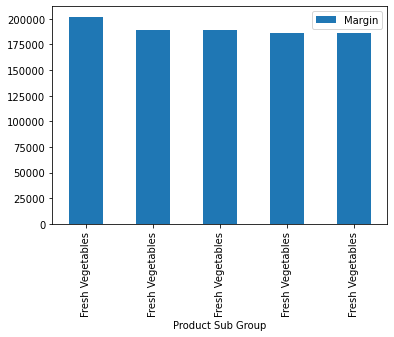

In [28]:
#Five most profitable products Plot
df_final[["Margin","Product Sub Group"]].sort_values(ascending=False, by="Margin").head().plot(kind="bar",x="Product Sub Group", y='Margin')

### 5.1.2 Five most un-profitable products

In [29]:
df_final.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', '%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number',
       'Customer', 'City Code', 'City', 'Region', 'Latitude', 'Longitude',
       'Desc', 'Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3',
       'Sales Rep ID'],
      dtype='object')

In [30]:
# Five most unprofitable products
df_final[["Margin","Product Sub Group"]].sort_values(ascending=True, by="Margin").head(5)

,Margin,Product Sub Group
91258,-27929.88,Soda
86,-15122.77,Soda
21960,-13749.60,Dried Fruit
55214,-11903.00,Wine
68505,-10945.35,Hot Dogs


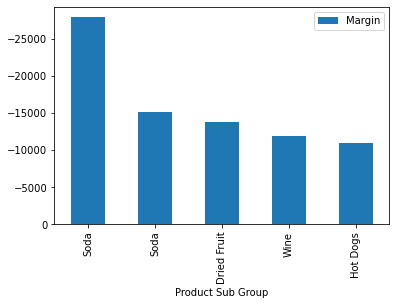

In [31]:
#Five most un-profitable products plot
ay=df_final[["Margin","Product Sub Group"]].sort_values(ascending=True, by="Margin").head().plot(kind="bar",x="Product Sub Group", y='Margin')
ay.invert_yaxis()

<AxesSubplot:xlabel='Margin', ylabel='Product Sub Group'>

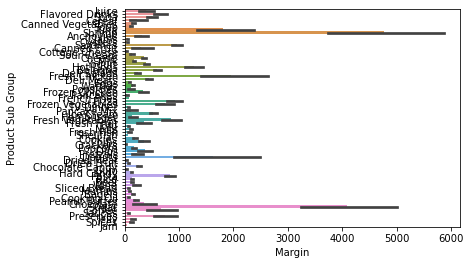

In [32]:
#Plot using Seaborne
sns.barplot(x="Margin", y="Product Sub Group", data=df_final)

## 5.2 For region perfromance
- Five most highest Grossing Regions
- Five least Grossing Regions

In [33]:
df_final.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', '%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number',
       'Customer', 'City Code', 'City', 'Region', 'Latitude', 'Longitude',
       'Desc', 'Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3',
       'Sales Rep ID'],
      dtype='object')

In [34]:
# Five most highest Grossing Regions
df_final[["Region","GrossSales"]].sort_values(ascending=False, by="Region").head(5)

,Region,GrossSales
48610,USA,192.9756
46821,USA,163.0656
46619,USA,77.0948
46620,USA,80.3068
46621,USA,88.0560


<AxesSubplot:xlabel='Region'>

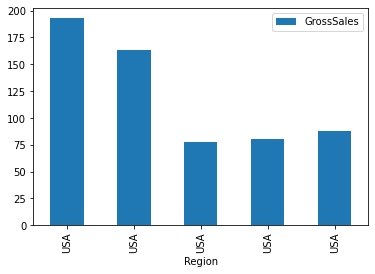

In [35]:
# Five most highest Grossing Regions plot
df_final[["Region","GrossSales"]].sort_values(ascending=False, by="Region").head().plot(kind="bar",x="Region", y="GrossSales")

In [36]:
# Five least Grossing Regions
df_final[["Region","GrossSales"]].sort_values(ascending=True, by="Region").head(5)

,Region,GrossSales
20786,Germany,68.4399
29000,Germany,25.5123
43469,Germany,50.3424
29003,Germany,17.1970
43465,Germany,118.3045


<AxesSubplot:xlabel='Region'>

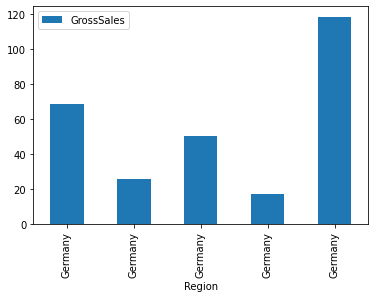

In [37]:
# Five least Grossing Regions plot
df_final[["Region","GrossSales"]].sort_values(ascending=True, by="Region").head().plot(kind="bar",x="Region", y="GrossSales")

<AxesSubplot:xlabel='Region', ylabel='GrossSales'>

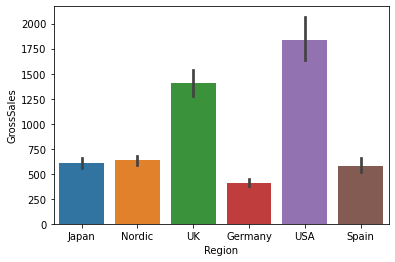

In [38]:
#Plot using Seaborne
sns.barplot(x="Region", y="GrossSales", data=df_final)

## 5.2 For sales representative performance
- Highest five sales by sales reps ?
- Least five sales by sales reps ?

In [39]:
df_final.columns

Index(['Item Number', 'Product Group', 'Product Line', 'Product Sub Group',
       'Product Type', '%KEY', 'Cost', 'Customer Number', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Margin', 'Order Number',
       'Promised Delivery Date', 'Sales', 'Sales Qty', 'Sales Rep Number',
       'Customer', 'City Code', 'City', 'Region', 'Latitude', 'Longitude',
       'Desc', 'Manager', 'Manager Number', 'Path', 'Sales Rep Name',
       'Sales Rep Name1', 'Sales Rep Name2', 'Sales Rep Name3',
       'Sales Rep ID'],
      dtype='object')

In [40]:
# Highest five sales by sales reps
df_final[["Sales Rep Name","GrossSales","City", "Region"]].sort_values(ascending=False, by="GrossSales").head(5)

,Sales Rep Name,GrossSales,City,Region
15066,Lee Chin,539200.0,Baltimore,USA
15125,Lee Chin,539200.0,Seattle,USA
15075,Lee Chin,539200.0,Baltimore,USA
14996,Lee Chin,539200.0,New Orleans,USA
15007,Lee Chin,539200.0,New Orleans,USA


<AxesSubplot:xlabel='Sales Rep Name'>

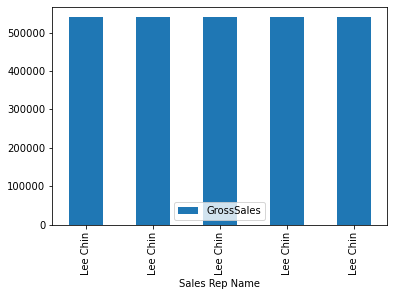

In [41]:
# Highest five sales by sales reps Plot
df_final[["Sales Rep Name","GrossSales"]].sort_values(ascending=False, by="GrossSales").head().plot(kind="bar",x="Sales Rep Name", y='GrossSales')

In [42]:
# Least five sales by sales reps
df_final[["Sales Rep Name","GrossSales","City", "Region"]].sort_values(ascending=True, by="GrossSales").head(5)

,Sales Rep Name,GrossSales,City,Region
91258,Angelen Carter,-27929.8752,Indianapolis,USA
68505,Kathy Clinton,-17362.2000,Sapporo,Japan
68429,Kathy Clinton,-17362.2000,Liverpool,UK
68220,Kathy Clinton,-17362.2000,Helsinki,Nordic
86,Molly McKenzie,-15122.7650,Osaka,Japan


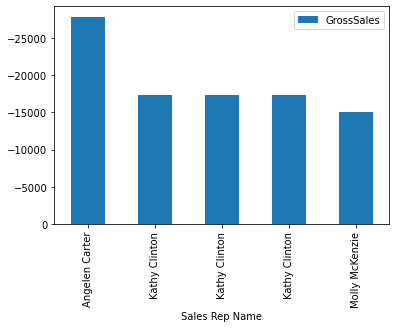

In [43]:
# Least five sales by sales reps Plot
ay=df_final[["Sales Rep Name","GrossSales"]].sort_values(ascending=True, by="GrossSales").head().plot(kind="bar",x="Sales Rep Name", y='GrossSales')
ay.invert_yaxis()

<AxesSubplot:xlabel='Sales Rep Name', ylabel='GrossSales'>

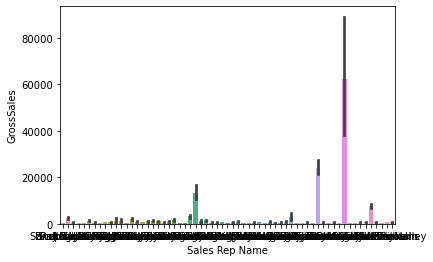

In [44]:
#Plot using Seaborne
sns.barplot(x="Sales Rep Name", y="GrossSales", data=df_final)

# 6.0 Communicate (Hypothesis)
- Based on your analysis: Propose an hypothesis around patterns and correlations revealed during the analysis.
Creates appropriate visualizations that support the findings and insights. 
Identifies key insights pertaining to the original business question(s).
Incorporates results of the analysis to support decisions and recommendations. 

**Hypothesis**
From the analysis of data it seems that there are sub product groups that are more profitable and some that are not very profitable. Also some regions seem to be more profitable while some regions seems to be less profitable. 
Futhrmore sales representatives performance seem to be widely varying this could be due to diffrent regions and also due to unmotivated sales representatives.  

**Observation**
Fresh Vegetables seem to be the most profitable product due to high profit margin. Least proftiable products are Soda, dried fruits and wine due to the low profit margins of the products. 
Among different regions USA has the most gross sales while Germany is the least grossing sales region. 
Lee Chin is the top perfoming Sales representative from USA covering Baltimore, Seattle and New Orleans.
Angeleen Carter from USA, Indianapolis is the worst perfroming sales representative.


**Recommendation**
From this analysis it is recommended to replace product categories with the least profit margin with prodcuts with a higher profit margin. Alternatively try to sell more products with lower profit margins such as Fast Moving Consumer Goods (FMCG). Also management needs to look into why some regions are performing better than the others. This could be due to many reasons such as due to cultural differences different regions may prefer different products. Also another contributing factor could be that Sales representatives are not effective in sales in lower performing regions. Hence it is recommended that a fact finding mission conducted based on the above data. It is highly recommended further deep analysis of the data is conducted to understand and gain new insights. 